### 1次元のカーブフィッティング

scipy.optimize.curve_fitによるカーブフィッティング
polyvalは多項式のみだから汎用的でない

#### 1次の多項式

In [2]:
# 必要なモジュールのインポート
from numpy import *
from matplotlib.pyplot import *
from scipy.optimize import curve_fit

In [3]:
# モデルを用意する
def model_poly1d(x, a, b):
    return a * x + b

In [4]:
# データを用意する
x = linspace(-5, 5, 101)
y_model = model_poly1d(x, a=5, b=10)

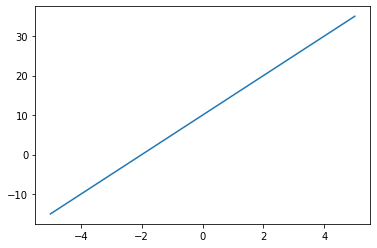

In [5]:
plot(x, y_model)

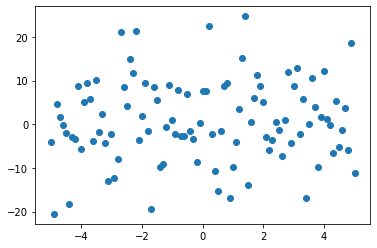

In [6]:
noise = random.normal(0, 10, len(x))
scatter(x, noise)

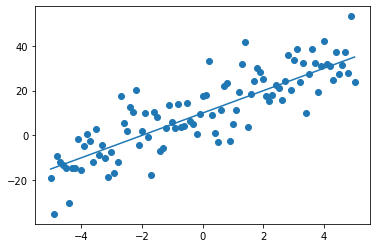

In [13]:
y_exp = y_model + noise
scatter(x, y_exp)
plot(x, y_model)
savefig('fitting.svg', format='svg', dpi=1200)

In [8]:
param, covar = curve_fit(model_poly1d, x, y_exp)
param

array([ 5.18306663, 10.82310477])

In [9]:
# error
print(covar)
print(diag(covar))
print(sqrt(diag(covar)))

[[ 1.01462052e-01 -3.50941642e-10]
 [-3.50941642e-10  8.62427445e-01]]
[0.10146205 0.86242744]
[0.31853109 0.92866972]


In [10]:
y_fit = model_poly1d(x, param[0], param[1])

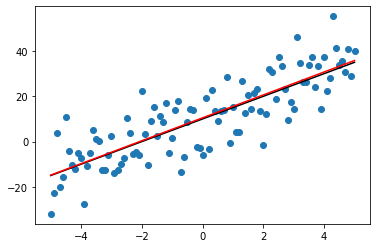

In [10]:
%matplotlib inline
scatter(x, y_exp)
plot(x, y_model, color='black')
plot(x, y_fit, color='red')

#### 指数関数

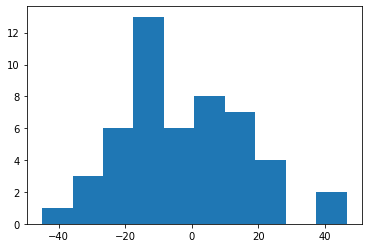

In [21]:
h = hist(noise, bins=10)

In [13]:
def gaussian(x, mu, sigma):
    return (1/sqrt(2*pi*power(sigma,2))) * exp(-power(x-mu,2)/sqrt(2*power(sigma,2)))

In [34]:
param, covar = curve_fit(gaussian, h[1][:-1], h[0])

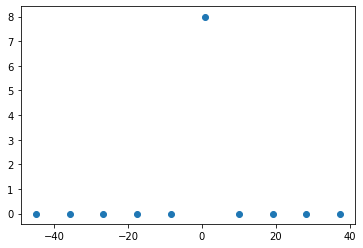

In [37]:
noise_fit = gaussian(h[1][:-1], param[0], param[1])
scatter(h[1][:-1], noise_fit)